# KNN Recommendation System

In this kernel, i looked over anime industry in the light of MyAnimeList dataset that is Imdb of Anime. I tried to use various visualization libraries and create all of the major chart types for data visualization. 

Anime is hand-drawn and computer animation originating from or associated with Japan. The History of anime can be traced back to the start of the 20th century, with the earliest verifiable films dating from 1917 (wikipedia)

As an old anime watcher i must say this firstly: Anime is not a cartoon :) There are some of my favorite animes at the following picture. Lets begin.

<img src="https://i.ibb.co/9Z03vtj/anime-world.jpg" width="1600px"> 

# DATA VISUALIZATION #


## 1. Importing Libraries And Loading Datasets

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


#Loading Dataset

df_anime = pd.read_csv('input/anime_filtered.csv')
df_users = pd.read_csv('input/users_filtered.csv')
df_userlists = pd.read_csv('input/animelists_filtered.csv')

MemoryError: Unable to allocate 64.0 MiB for an array with shape (8, 1048575) and data type object

## 2. Data Exploration and Preparation 

In [2]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14474 entries, 0 to 14473
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14474 non-null  int64  
 1   title           14474 non-null  object 
 2   title_english   5723 non-null   object 
 3   title_japanese  14440 non-null  object 
 4   title_synonyms  8936 non-null   object 
 5   image_url       14378 non-null  object 
 6   type            14474 non-null  object 
 7   source          14474 non-null  object 
 8   episodes        14474 non-null  int64  
 9   status          14474 non-null  object 
 10  airing          14474 non-null  bool   
 11  aired_string    14474 non-null  object 
 12  aired           14474 non-null  object 
 13  duration        14474 non-null  object 
 14  rating          14474 non-null  object 
 15  score           14474 non-null  float64
 16  scored_by       14474 non-null  int64  
 17  rank            12901 non-null 

In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   username                  116132 non-null   object 
 1   user_id                   116133 non-null   float64
 2   user_watching             116133 non-null   float64
 3   user_completed            116133 non-null   float64
 4   user_onhold               116133 non-null   float64
 5   user_dropped              116133 non-null   float64
 6   user_plantowatch          116133 non-null   float64
 7   user_days_spent_watching  116133 non-null   float64
 8   gender                    116133 non-null   object 
 9   location                  116127 non-null   object 
 10  birth_date                116133 non-null   object 
 11  access_rank               0 non-null        float64
 12  join_date                 116133 non-null   object 
 13  last_online               1

In [4]:
df_userlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35802006 entries, 0 to 35802005
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_start_date        object 
 4   my_finish_date       object 
 5   my_score             int64  
 6   my_status            int64  
 7   my_rewatching        float64
 8   my_rewatching_ep     int64  
 9   my_last_updated      int64  
 10  my_tags              object 
dtypes: float64(1), int64(6), object(4)
memory usage: 2.9+ GB


In [5]:
df_anime.head(3)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."


In [6]:
df_users.head(3)

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,Age,Date
0,karthiga,2255153.0,3.0,49.0,1.0,0.0,0.0,55.31,Female,"Chennai, India",4/29/1990,NaN,3/3/2013,2/4/2014 1:32,7.43,0.0,3391.0,32.142466,12/1/2022
1,RedvelvetDaisuki,1897606.0,61.0,396.0,39.0,0.0,206.0,118.07,Female,Manila,1/1/1995,NaN,12/13/2012,5/13/1900 2:47,6.78,80.0,7094.0,27.534247,12/1/2022
2,Damonashu,37326.0,45.0,195.0,27.0,25.0,59.0,83.70,Male,"Detroit,Michigan",8/1/1991,NaN,2/13/2008,3/24/1900 12:48,6.15,6.0,4936.0,30.90411,12/1/2022


In [7]:
df_userlists.head(3)

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN
1,RedvelvetDaisuki,21,0,0000-00-00,0000-00-00,0,3,0.0,0,1355480701,NaN
2,Damonashu,21,418,0000-00-00,0000-00-00,10,1,0.0,0,1254296345,NaN


In [8]:
anime = df_anime[df_anime.genre.notnull()][['anime_id','title','type','source','score','scored_by','rank','popularity','genre']]
users = df_users[df_users.gender.isin(['Female','Male'])][['username','gender','user_completed','user_days_spent_watching','birth_date' ]]
userlists = df_userlists[df_userlists.my_status.isin([1,2]) & df_userlists.anime_id.notnull()][['username', 'anime_id', 'my_score', ]]

userlists = pd.merge(userlists,users, how='inner')
userlists = pd.merge(userlists,anime, how='left')

userlists_sub = userlists[userlists.genre.notnull()].head(100000)
userlists_sub.head()

,username,anime_id,my_score,gender,user_completed,user_days_spent_watching,birth_date,title,type,source,score,scored_by,rank,popularity,genre
0,karthiga,21,9,Female,49.0,55.31,4/29/1990,One Piece,TV,Manga,8.54,423868.0,91.0,35.0,"Action, Adventure, Comedy, Super Power, Drama,..."
1,karthiga,59,7,Female,49.0,55.31,4/29/1990,Chobits,TV,Manga,7.53,175388.0,1546.0,188.0,"Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen"
2,karthiga,74,7,Female,49.0,55.31,4/29/1990,Gakuen Alice,TV,Manga,7.77,33244.0,941.0,1291.0,"Comedy, School, Shoujo, Super Power"
3,karthiga,120,7,Female,49.0,55.31,4/29/1990,Fruits Basket,TV,Manga,7.77,167968.0,939.0,222.0,"Slice of Life, Comedy, Drama, Romance, Fantasy..."
4,karthiga,178,7,Female,49.0,55.31,4/29/1990,Ultra Maniac,TV,Manga,7.26,9663.0,2594.0,2490.0,"Magic, Comedy, Romance, School, Shoujo"


###  In Terms Of Rank And Popularity TOP 100 Animes (Plotly Bubble Chart, WordCloud, PointPlot)

#### Hyperparameter Tunning

In [9]:
#Hyperparameter tunning
anime_rank_100 = df_anime[df_anime.popularity!=0].sort_values(by='rank').head(100).loc[:,['popularity','rank', 'title','type', 'source', 'scored_by','favorites','score']]
popularity_and_rank_100 = anime_rank_100[(anime_rank_100.popularity <= 100)]
popularity_and_rank_100["point"] = (popularity_and_rank_100["scored_by"] * popularity_and_rank_100["favorites"] * popularity_and_rank_100["score"]) / 10000000000
popularity_and_rank_100

,popularity,rank,title,type,source,scored_by,favorites,score,point
2555,4,1.0,Fullmetal Alchemist: Brotherhood,TV,Manga,733592,106895,9.25,72.536018
1028,33,2.0,Kimi no Na wa.,Movie,Original,471398,34912,9.19,15.124394
2999,8,5.0,Steins;Gate,TV,Visual novel,563857,92423,9.14,47.631607
418,35,8.0,Hunter x Hunter (2011),TV,Manga,403377,64375,9.11,23.656296
6572,77,12.0,Koe no Katachi,Movie,Manga,296261,19815,9.04,5.306852
2783,55,14.0,Clannad: After Story,TV,Visual novel,363239,47380,9.01,15.506448
6553,95,15.0,Gintama,TV,Manga,141830,33781,9.01,4.316834
7403,22,18.0,Code Geass: Hangyaku no Lelouch R2,TV,Original,543904,44230,8.95,21.530902
7105,39,19.0,Sen to Chihiro no Kamikakushi,Movie,Original,498602,15412,8.92,6.854533
11640,37,21.0,Shigatsu wa Kimi no Uso,TV,Manga,413527,39664,8.88,14.565096


In [67]:
data = [
    {
        'y':popularity_and_rank_100["popularity"],
        'x': popularity_and_rank_100["rank"],
        'mode': 'markers',
        'marker': {
            'color': popularity_and_rank_100["popularity"],
            'size':  popularity_and_rank_100["point"],
            'showscale': True,
            'sizemin':4
        },
        "text" :  popularity_and_rank_100["title"]
    }
]

layout = go.Layout(title='In Terms Of Rank And Popularity TOP 100 Animes',
                   xaxis=dict(title='Rank'),
                   yaxis=dict( title='Popularity'),
                   autosize=False,
                   width=800,
                   height=600
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [11]:
df_title = popularity_and_rank_100['title'].astype("str").tolist()
df_point  = popularity_and_rank_100['point'].astype("int32").tolist()

list_popularity_and_rank_100 = []

for i in range(0, len(df_point)):
    for j in range(0, df_point[i]):
        list_popularity_and_rank_100.append(df_title[i])

list_popularity_and_rank_100[-10:]

['One Piece',
 'One Piece',
 'One Piece',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Mob Psycho 100',
 'Mob Psycho 100']

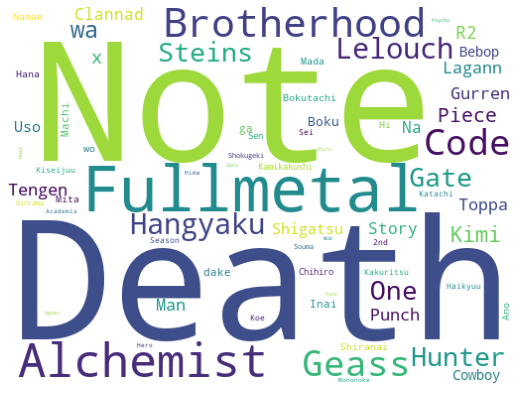

In [12]:
plt.subplots(figsize=(14,7))
wordcloud = WordCloud(    collocations=False,
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(list_popularity_and_rank_100))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [13]:
anime_sorted_by_pop = df_anime[df_anime.popularity!=0].sort_values(by='popularity').head(100).loc[:,['title','popularity','rank']]
anime_sorted_by_pop.head()

,title,popularity,rank
7913,Death Note,1,51.0
8123,Shingeki no Kyojin,2,110.0
6296,Sword Art Online,3,1259.0
2555,Fullmetal Alchemist: Brotherhood,4,1.0
8863,One Punch Man,5,44.0


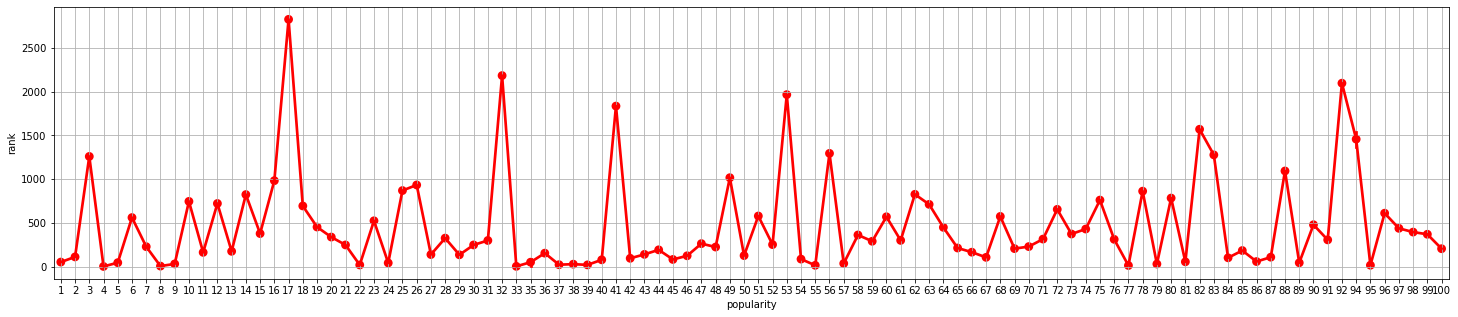

In [14]:
f,ax1 = plt.subplots(figsize =(25,5))
sns.pointplot(x='popularity',y='rank',data=anime_sorted_by_pop,color='red')
plt.grid()

In [15]:
anime_sorted_by_pop[anime_sorted_by_pop["popularity"]==17]

,title,popularity,rank
5230,Sword Art Online II,17,2827.0


### The Most Popular Genres In The Anime Industry (With Multi-label Tags) (Bar Plots, Pie Chart, WordCloud) 

In [16]:
anime_genre = anime.genre
anime_genre.head()

0      Comedy, Supernatural, Romance, Shounen
1    Comedy, Parody, Romance, School, Shounen
2               Comedy, Magic, School, Shoujo
3      Comedy, Drama, Magic, Romance, Fantasy
4             Comedy, Drama, Romance, Shounen
Name: genre, dtype: object

In [18]:
genre_list = []

genre_splited = []

for i in anime_genre.index:
    for j in anime_genre[i].split(", "):
        genre_splited.append(j)
        if j not in genre_list:
            genre_list.append(j)  

In [19]:
genre_splited[0:6]

['Comedy', 'Supernatural', 'Romance', 'Shounen', 'Comedy', 'Parody']

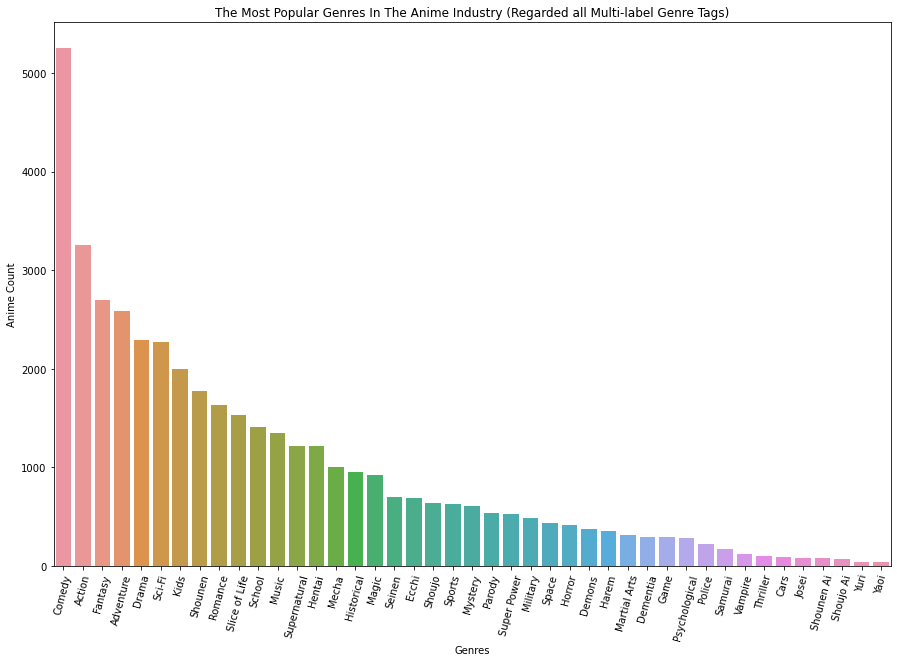

In [20]:
anime_genres_count = pd.Series(genre_splited).value_counts() 

plt.figure(figsize=(15,10))
sns.barplot(x=anime_genres_count.index.tolist(), y=anime_genres_count.tolist())
plt.xlabel('Genres')
plt.ylabel('Anime Count')
plt.title('The Most Popular Genres In The Anime Industry (Regarded all Multi-label Genre Tags)') 
plt.xticks(rotation= 75) 
plt.show()

In [21]:
genre_firsts = []

for i in anime_genre.index:
    genre_firsts.append(anime_genre[i].split(", ")[0])

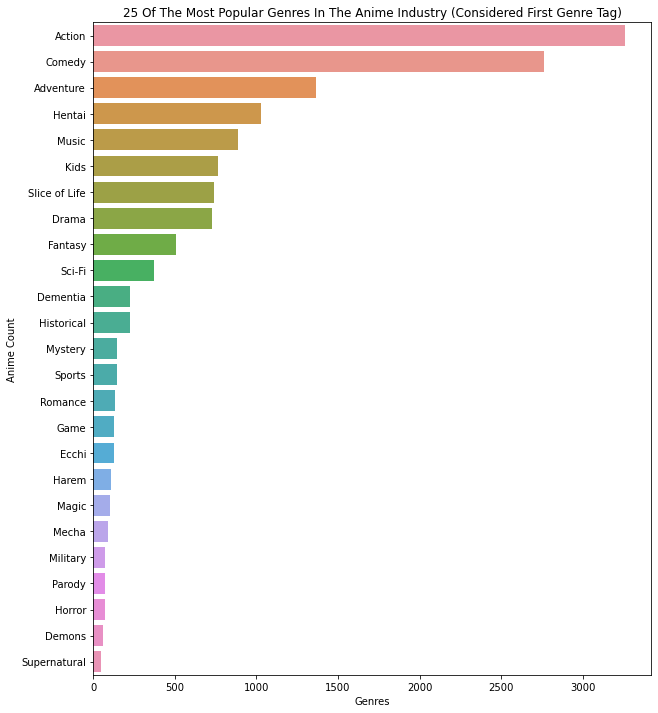

In [22]:
anime_genres_firsts = pd.Series(genre_firsts).value_counts()   

plt.figure(figsize=(10,12))
sns.barplot(x=anime_genres_firsts[0:25].tolist(), y=anime_genres_firsts[0:25].index.tolist())
plt.xlabel('Genres')
plt.ylabel('Anime Count')
plt.title('25 Of The Most Popular Genres In The Anime Industry (Considered First Genre Tag)') 
plt.show()

In [23]:
genres_with_comedy = []

for i in anime_genre.index:
    if anime_genre[i].find('Comedy') > -1:
        for j in anime_genre[i].split(", "):
            if j != 'Comedy':
                genres_with_comedy.append(j) 

In [24]:
genres_with_comedy_count = pd.Series(genres_with_comedy).value_counts().head(10)   

fig = {
  "data": [
    {
      "values": genres_with_comedy_count.tolist(),
      "labels": genres_with_comedy_count.index.tolist(),
      "domain": {"x": [0, .8]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },],
  "layout": {
        "title":"Top 10 Multi-label Tags With Comedy"
    }
}
iplot(fig)

In [25]:
genre_one_label = []

for i in anime_genre.index:
    if len(anime_genre[i].split(", ")) == 1:
        genre_one_label.append(anime_genre[i])         

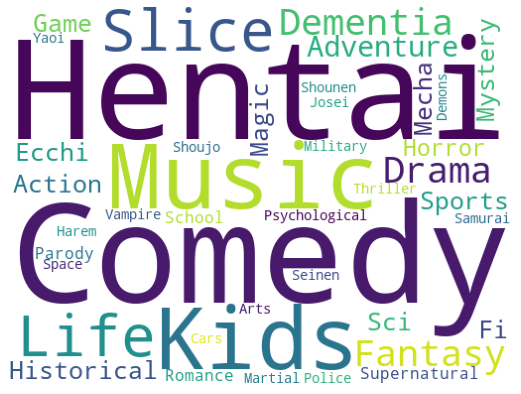

In [26]:
anime_genres_one_label_count = pd.Series(genre_one_label).value_counts()  

plt.subplots(figsize=(14,7))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(anime_genres_one_label_count.index.tolist()))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Genre Preferences According to Gender And Age-Gender Correlation (Bar Plots as Subplot, Scatter Plot, Boxplot) 

In [27]:
# for 43 genre
F = [0]*43
M =   [0]*43

genre_df = pd.DataFrame({'genre': genre_list, 'Female': F, 'Male': M})
genre_df.set_index('genre', inplace=True)

for i in userlists_sub.index:
    for j in userlists_sub.genre[i].split(", "):
        genre_df[userlists_sub.gender[i]][j] +=1 

In [28]:
genre_df.head()

,Female,Male
genre,,
Comedy,11204,38868
Supernatural,5183,16980
Romance,6659,20983
Shounen,5737,20616
Parody,833,3110


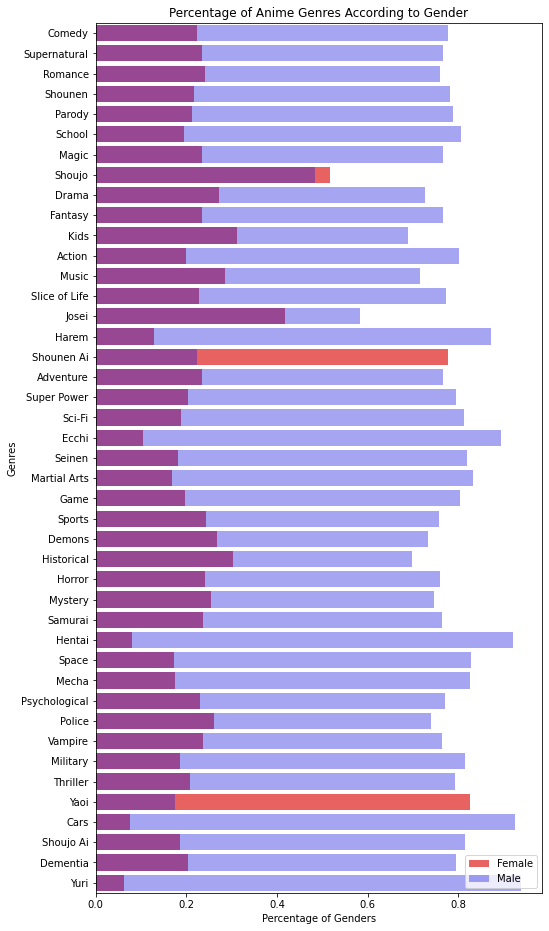

In [29]:
#genre
Female = []
Male = []

for i in genre_list:
    Female.append(genre_df.loc[i,'Female']/sum(genre_df.loc[i,:]))
    Male.append(genre_df.loc[i,'Male']/sum(genre_df.loc[i,:]))  

f,ax = plt.subplots(figsize=(8,16))
sns.barplot(x=Female, y=genre_list, label='Female', color='r', alpha = 0.7)
sns.barplot(x=Male, y=genre_list, label='Male', color='b', alpha = 0.4)

ax.set(xlabel='Percentage of Genders', ylabel='Genres', title='Percentage of Anime Genres According to Gender')
ax.legend(loc='lower right',frameon= True)
plt.show()

In [30]:
users['birth_date'] = pd.to_datetime(users['birth_date'], errors = 'coerce')
users=users[users.birth_date.notnull()]

birth_date = users.birth_date
gender = users.gender
spent = users.user_days_spent_watching
 
age = []
for each in birth_date:
    age.append(round((datetime.datetime.now()-each).days/365.25,1))

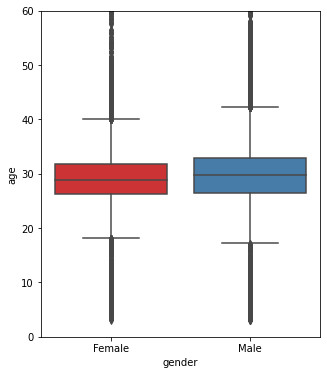

In [31]:
age_dict = {'gender':gender,'age':age,'spent':spent}
users_age_spent = pd.DataFrame(age_dict,columns=['gender','age','spent'])

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5, 6))
sns.boxplot(x="gender", y="age", data=users_age_spent, palette="Set1", ax=ax)
ax.set_ylim([0, 60])
plt.show()

In [32]:
age.sort()
age[0:5]

#in the first step i dropped obvious outliers

users_age_spent.drop(users_age_spent[users_age_spent.spent>1000].index, inplace=True)
users_age_spent.drop(users_age_spent[users_age_spent.age>80].index, inplace=True)

In [33]:
users_age_spent.head()

,gender,age,spent
0,Female,32.6,55.31
1,Female,28.0,118.07
2,Male,31.4,83.70
3,Male,32.0,167.16
4,Female,24.3,15.20


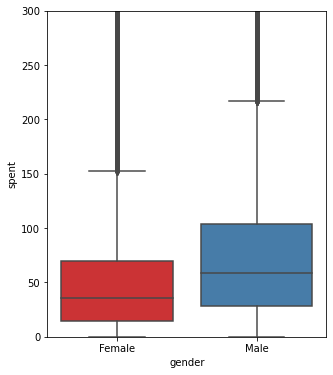

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5, 6))
sns.boxplot(x="gender", y="spent", data=users_age_spent, palette="Set1", ax=ax)
ax.set_ylim([0, 300])
plt.show()

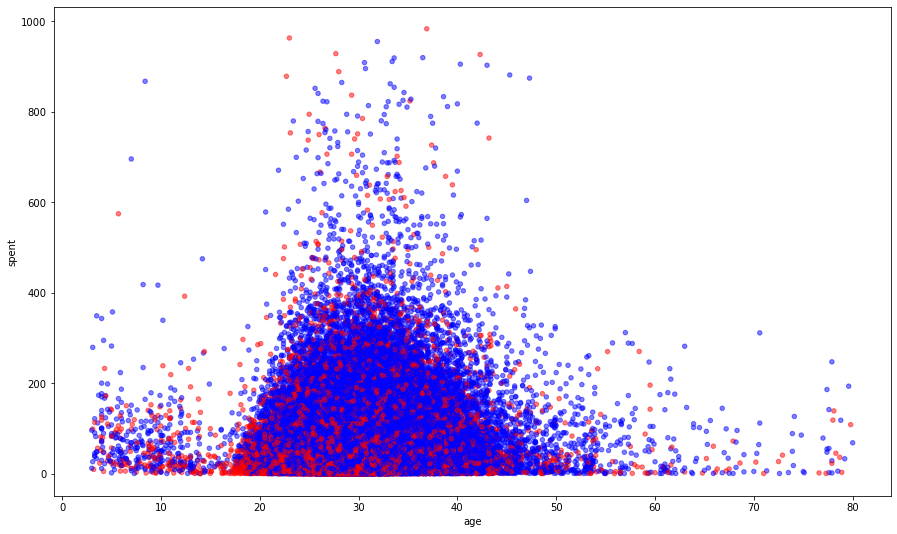

In [35]:
users_age_spent.plot(kind='scatter', x='age', y='spent', alpha=0.5, figsize = (15,9),
                     color=["r" if each =="Female" else "b" for each in users_age_spent.gender])
plt.show()

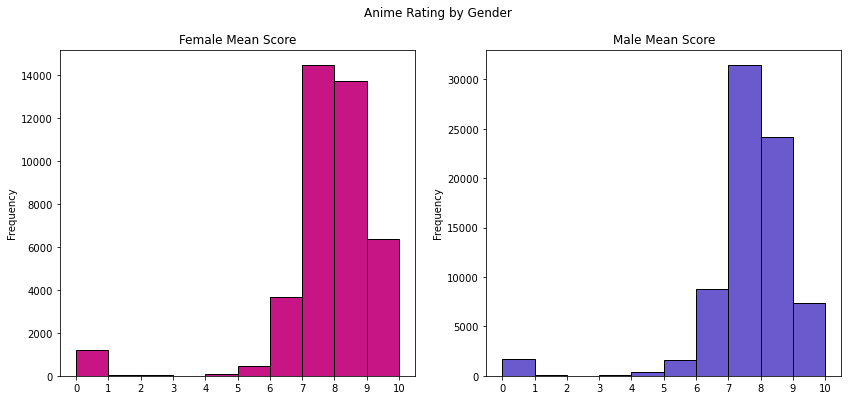

In [36]:
F_stats = df_users[(df_users["gender"]=='Female') & (df_users["stats_episodes"]>=0)].loc[:,["stats_rewatched","stats_mean_score"]]     
M_stats = df_users[(df_users["gender"]=='Male') & (df_users["stats_episodes"]>=0)].loc[:,["stats_rewatched","stats_mean_score"]]    

f,ax=plt.subplots(1,2,figsize=(14,6))
F_stats.stats_mean_score.plot.hist(ax=ax[0],bins=10,edgecolor='black',color='mediumvioletred')
ax[0].set_title('Female Mean Score')
x1=list(range(0,11,1))
ax[0].set_xticks(x1)
M_stats.stats_mean_score.plot.hist(ax=ax[1],bins=10,edgecolor='black',color='slateblue')
ax[1].set_title('Male Mean Score')
x2=list(range(0,11,1))
ax[1].set_xticks(x2)
plt.suptitle('Anime Rating by Gender')
plt.show()

### Features of Anime (Release, Types, Sources) (Bar Plots, Stacked Bar Plot) 

In [37]:
anime_premiered = df_anime[df_anime.premiered.notnull()].premiered
release_seasons = []

for i in anime_premiered.index:
    release_seasons.append(anime_premiered[i].split(" ")[0])

apc = pd.Series(release_seasons).value_counts()   
anime_premiered_count = pd.DataFrame({'season':apc.index, 'premier':apc.values, 'order':[1,3,4,2]})
anime_premiered_count.set_index('order', inplace=True)
anime_premiered_count.sort_index(inplace=True)

In [38]:
anime_premiered_count

,season,premier
order,,
1,Spring,1420
2,Summer,683
3,Fall,1211
4,Winter,782


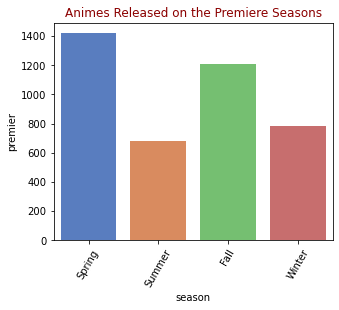

In [39]:
plt.figure(figsize=(5,4))
sns.barplot(x='season',y='premier', data=anime_premiered_count, palette="muted")
plt.xticks(rotation=60)
plt.title('Animes Released on the Premiere Seasons',color = 'darkred',fontsize=12)
plt.show()

In [40]:
anime_premiered = df_anime[df_anime.premiered.notnull()].premiered
premier_seasons = []
premier_years = []


for i in anime_premiered.index:
    if(2009 <= int(anime_premiered[i].split(" ")[1]) <= 2018):
        premier_seasons.append(anime_premiered[i].split(" ")[0])
        premier_years.append(anime_premiered[i].split(" ")[1])
        
premier_df = pd.DataFrame({
                            'Year':premier_years,
                            'Spring': [1 if each == 'Spring' else 0 for each in premier_seasons],
                            'Summer': [1 if each == 'Summer' else 0 for each in premier_seasons],
                            'Fall':   [1 if each == 'Fall'   else 0 for each in premier_seasons],
                            'Winter': [1 if each == 'Winter' else 0 for each in premier_seasons],
                            })

premier_years_seasons = premier_df.groupby(['Year'])['Spring','Summer','Fall','Winter'].agg('sum')

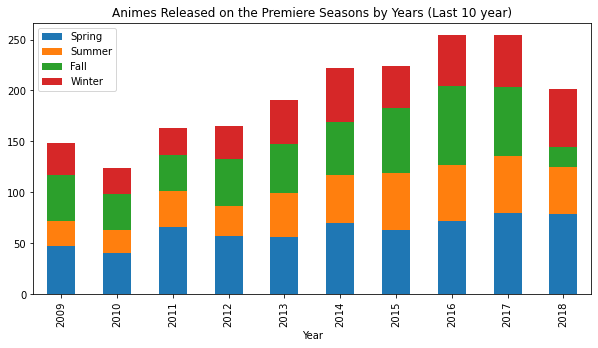

In [41]:
premier_years_seasons.plot(kind='bar',stacked=True, figsize=(10,5), title='Animes Released on the Premiere Seasons by Years (Last 10 year)')
plt.show()

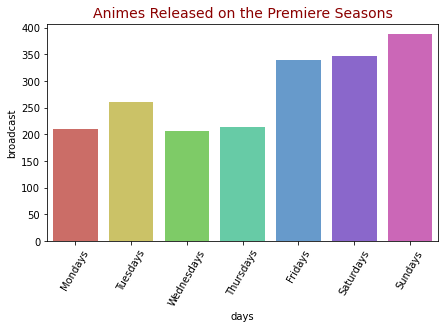

In [42]:
broadcast = [x.split(" at ")[0].strip() for x in df_anime["broadcast"].astype("str")]
broad_days = pd.Series(broadcast).value_counts()[2:9]
df_broad_days = pd.DataFrame({'days':broad_days.index, 'broadcast':broad_days.values, 'index':[7,6,5,2,4,1,3]}).set_index('index').sort_index()

plt.figure(figsize=(7,4))
sns.barplot(x='days',y='broadcast', data=df_broad_days, palette="hls")
plt.xticks(rotation=60)
plt.title('Animes Released on the Premiere Seasons',color = 'darkred',fontsize=14)
plt.show()

In [43]:
animetypes = df_anime['type'].value_counts(dropna=False)

In [44]:
print(animetypes)

TV         4271
OVA        3608
Movie      2624
Special    1948
ONA        1144
Music       849
Unknown      30
Name: type, dtype: int64


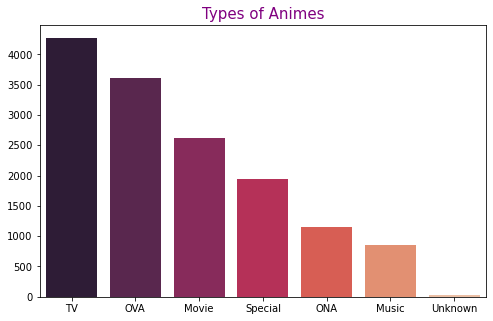

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x=animetypes.index,y=animetypes.values, palette="rocket")
plt.title('Types of Animes',color = 'purple',fontsize=15)
plt.show()

In [46]:
animesources= df_anime['source'].value_counts(dropna=False)
animesources = animesources[animesources.index != 'Unknown']

In [47]:
animesources.head(5)

Original        3367
Manga           3119
Visual novel     887
Game             607
Light novel      563
Name: source, dtype: int64

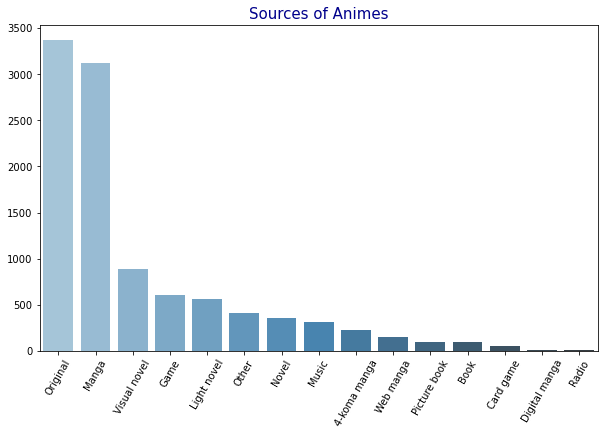

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x=animesources.index,y=animesources.values, palette="Blues_d")
plt.xticks(rotation=60)
plt.title('Sources of Animes',color = 'darkblue',fontsize=15)
plt.show()

### Best Studio Ghibli Movies & Anime Movies By Years (Plotly Bubble Chart, Line Charts) 

In [49]:
df_anime_ghibli = df_anime[(df_anime.favorites >= 500) & (df_anime["rank"] <= 500) & (df_anime.title_english.notnull()) & 
                           (df_anime.studio == 'Studio Ghibli') & (df_anime.type == 'Movie')]
anime_ghibli = df_anime_ghibli.loc[:,["title_english", "favorites", "aired_string", "rank", "score"]]

In [50]:
#i normalized the result with p_norm
anime_ghibli["p_norm"] = ((anime_ghibli["favorites"] - np.min(anime_ghibli["favorites"]))) / (np.max(anime_ghibli["favorites"]) - np.min(anime_ghibli["favorites"]))
#i added 000001 to showed The Tale of the Princess Kaguya which has 0 p_norm.
anime_ghibli["point"] = (anime_ghibli["p_norm"]+0.000001)*75
anime_ghibli["year"] = [x.split(", ")[1] for x in anime_ghibli["aired_string"]]
anime_ghibli.loc[2258:2259,"title_english"] = "Howl's Moving Castle"

In [51]:
anime_ghibli.sort_values("rank")

,title_english,favorites,aired_string,rank,score,p_norm,point,year
7105,Spirited Away,15412,"Jul 20, 2001",19.0,8.92,1.000000,75.000075,2001
2068,Princess Mononoke,10689,"Jul 12, 1997",29.0,8.80,0.677236,50.792804,1997
2258,Howl's Moving Castle,9753,"Nov 20, 2004",43.0,8.73,0.613271,45.995428,2004
12755,Grave of the Fireflies,2921,"Apr 16, 1988",83.0,8.55,0.146381,10.978685,1988
885,My Neighbor Totoro,4194,"Apr 16, 1988",135.0,8.45,0.233377,17.503321,1988
8383,Castle in the Sky,1811,"Aug 2, 1986",179.0,8.38,0.070526,5.289489,1986
1626,The Tale of the Princess Kaguya,779,"Nov 23, 2013",220.0,8.32,0.000000,0.000075,2013
2176,Whisper of the Heart,1619,"Jul 15, 1995",239.0,8.30,0.057404,4.305412,1995
5991,When Marnie Was There,910,"Jul 19, 2014",258.0,8.28,0.008952,0.671503,2014
11857,The Wind Rises,962,"Jul 20, 2013",316.0,8.20,0.012506,0.938023,2013


In [52]:
data = [
    {
        'y':anime_ghibli["score"],
        'x': anime_ghibli["rank"],
        'mode': 'markers',
        'marker': {
            'color':anime_ghibli["score"],
            'size':  anime_ghibli["point"],
            'showscale': True,
            'sizemin':3
        },
        "text" : anime_ghibli["title_english"] + ' (' + anime_ghibli["year"] + ')'
    }
]

layout = go.Layout(title='Popular Anime Movies From Studio Ghibli',
                   xaxis=dict(title='Rank'),
                   yaxis=dict( title='Score'),
                   autosize=False,
                   width=800,
                   height=600
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [53]:
anime_movies = df_anime[(df_anime.type == "Movie") & (df_anime.aired_string != "Not available")]
anime_movies["year"] = [x.split(",")[1].strip()[0:4] if len(x.split(",")) > 1 else x.split(",")[0].strip()[0:4] for x in anime_movies["aired_string"]]
#location = [x.split(",")[1].strip() if len(x.split(",")) > 1 else x.split(",")[0].strip() for x in df_users["location"].astype("str")]
anime_movies = anime_movies["year"].value_counts()
anime_movies_years = pd.DataFrame({'Year':anime_movies.index, 'Movie Count':anime_movies.values})
anime_movies_years = anime_movies_years.sort_values("Year")
#i think 2018 and 2019 is incomplete
anime_movies_years = anime_movies_years.iloc[:-2,:]

In [54]:
fig = px.line(anime_movies_years, x="Year", y="Movie Count", 
              title='Anime Movies by Years', width=750, height=400)
fig.show()

### Anime Watchers Around The World (In MyAnimeList Members) (Plotly Map Plot)

In [55]:
location = [x.split(",")[1].strip() if len(x.split(",")) > 1 else x.split(",")[0].strip() for x in df_users["location"].astype("str")]

In [56]:
pd.Series(location).value_counts()[:5] 

nan           932448
Poland          3755
California      2947
Germany         2250
Canada          2223
dtype: int64

In [57]:
location = ["USA" if x in ("USA", "United States of America", "U.S.A.", "US", "U.S.", "U.S.A", 
                           "usa", "United States", "California", "Texas", "New York", "Florida", 
                           "Ohio", "Michigan", "Illinois", "Washington", "Pennsylvania", "Virginia", 
                           "Arizona", "Maryland", "Tennessee",  "New Jersey", "North Carolina", 
                           "Colorado", "Oregon", "Indiana", "Massachusetts", "Minnesota", "NY", "CA", 
                           "TX", "FL", "PA", "IL", "MA", "NC", "NJ", "AZ", "GA", "VA", "IN","TN", 
                           "MI", "SC", "MN", "NYC", "MD", "MO", "WI", "Tx", "CT", "NV", "OR", "KY", 
                           "OH", "Ca", "CO", "LA", "DC", "AL", "ny", "NH", "Philadelphia", "north carolina", 
                           "Missouri", "Nevada", "Kentucky", "Louisiana", "Connecticut", "california", 
                           "Oklahoma", "Alabama", "Hawaii", "Kansas", "Utah", "Iowa", "South Carolina", 
                           "Arkansas", "Nebraska", "texas", "Southern California", "New England", 
                           "Mississippi", "florida", "new york", "Idaho", "New Mexico", "Chicago", 
                           "New Hampshire", "Los Angeles", "Rhode Island", "New York City", "Maine", 
                           "America", "Alaska", "Delaware", "Northern Ireland", "ohio", "Seattle", 
                           "West Virginia", "North Dakota", "South Dakota", "Boston", "Vermont", "Montana", 
                           "michigan", "washington", "New york", "Las Vegas", "Wisconsin", 
                           "Washington State", "SoCal")  else x for x in location]
location = ["UK" if x in ("England", "england", "United Kingdom", "Scotland", "Glasgow", "London", "london", 
                          "Wales", "Manchester", "Nottingham", "Kent", "England.", "united kingdom", "Essex", 
                          "UK", "Uk", "uk", "Britain", "Liverpool", "Birmingham") else x for x in location]
location = ["Netherlands" if x in ("Netherlands", "The Netherlands", "Nederland", "Netherland", "the Netherlands", 
                                   "The netherlands", "netherlands", "Holland", "Amsterdam", "Utrecht", "Rotterdam", 
                                   "Limburg", "the netherlands", "Zuid-Holland") else x for x in location]
location = ["Canada" if x in ("Canada", "canada", "CANADA", "Ontario", "ON", "Quebec", "Québec", "Alberta", 
                              "Toronto", "Vancouver", "British Columbia", "Saskatchewan", "ontario", "BC", 
                              "Montreal", "Manitoba", "Nova Scotia") else x for x in location]
location = ["Brazil" if x in ("Brazil", "Brasil", "São Paulo", "Sao Paulo", "São Paulo - Brazil", "Paraná", 
                              "Pará", "Rio de Janeiro", "RJ", "RS", "SP", "MG", "DF", "Porto Alegre", 
                              "Minas Gerais", "brasil", "Brasil.", "Rio Grande do Sul", "Santa Catarina", 
                              "Bahia", "Ceará", "Pernambuco", "Brazil.", "brazil", 
                              "Goiás") else x for x in location]
location = ["Russia" if x in ("Russia", "Moscow", "Russian Federation", "Saint-Petersburg", "St. Petersburg", 
                              "Saint Petersburg", "Novosibirsk", "Россия", 
                              "St.Petersburg") else x for x in location]
location = ["Japan" if x in ("Japan", "japan", "Tokyo", "tokyo", "Ikebukuro", "Kyoto", 
                             "Osaka") else x for x in location]
location = ["Turkey" if x in ("Turkey", "Istanbul", "İstanbul", "istanbul", "Ankara", "Bursa", "Türkiye", 
                              "Turkiye", "turkey", 
                              "İzmir", "Izmir", "Antalya", "TURKEY") else x for x in location]
location = ["Philippines" if x in ("Philippines", "philippines", "Manila", "Cavite", "Phillipines", 
                                   "Metro Manila", "manila", "Cebu", "Laguna", 
                                   "Quezon City") else x for x in location]
location = ["Indonesia" if x in ("Indonesia", "Jakarta", "indonesia", "Bandung", "West Java", "Central Java", 
                                 "jakarta", "Jawa Timur", "Banten", "Jawa Barat", "East Java", "Indonesian", 
                                 "Yogyakarta") else x for x in location]
location = ["Spain" if x in ("Spain", "España", "Barcelona", "Madrid", "Valencia", 
                             "Catalonia") else x for x in location]
location = ["Poland" if x in ("Poland", "poland", "Warsaw", "Warszawa", "Poznań", "Łódź", "Gdańsk", "Wrocław", 
                              "Kraków", "Cracow", "Szczecin", "Gdynia", "Bydgoszcz", "Lublin", "Białystok", 
                              "Katowice", "Rzeszów", "Lodz") else x for x in location]
location = ["France" if x in ("France", "Paris", "france", "paris", "FRANCE") else x for x in location]
location = ["Australia" if x in ("Australia", "australia", "Sydney", "Melbourne", "Victoria", "WA", "NSW",
                                 "Western Australia", "New South Wales", "Adelaide", "Queensland", "Perth",
                                 "South Australia", "Brisbane") else x for x in location]
location = ["Portugal" if x in ("Portugal", "Lisbon", "Porto", "Lisboa", "portugal") else x for x in location]
location = ["Italy" if x in ("Italy", "Italia", "italy", "Rome", "Roma", "italia") else x for x in location]
location = ["Mexico" if x in ("Mexico", "México", "Mexico City", "mexico", "Baja California", 
                              "Jalisco") else x for x in location]
location = ["Argentina" if x in ("Argentina", "Buenos Aires") else x for x in location]
location = ["Greece" if x in ("Greece", "Athens", "greece", "athens") else x for x in location]
location = ["Hungary" if x in ("Hungary", "Budapest") else x for x in location]
location = ["India" if x in ("India", "india", "INDIA", "Mumbai") else x for x in location]
location = ["Sweden" if x in ("Sweden", "sweden", "Stockholm", "Gothenburg") else x for x in location]
location = ["Latvia" if x in ("Latvia", "Riga") else x for x in location]
location = ["Germany" if x in ("Germany", "Berlin", "Deutschland", "NRW", "Hamburg", "germany", 
                               "Bavaria", "Hessen") else x for x in location]
location = ["Malaysia" if x in ("Malaysia", "malaysia", "Kuala Lumpur", "Selangor", 
                                "Sarawak") else x for x in location]
location = ["Bulgaria" if x in ("Bulgaria", "Sofia") else x for x in location]
location = ["Singapore" if x in ("Singapore", "singapore") else x for x in location]
location = ["Romania" if x in ("Romania", "Bucharest") else x for x in location]
location = ["Austria" if x in ("Austria", "Vienna") else x for x in location]
location = ["Israel" if x in ("Israel", "israel") else x for x in location]
location = ["Lithuania" if x in ("Lithuania", "Vilnius", "Kaunas") else x for x in location]
location = ["Czech Republic" if x in ("Czech Republic", "Czech republic", "Prague") else x for x in location]
location = ["Estonia" if x in ("Estonia", "Tallinn") else x for x in location]
location = ["Ukraine" if x in ("Ukraine", "Kiev", "Odessa") else x for x in location]
location = ["Norway" if x in ("Norway", "Oslo", "norway") else x for x in location]
location = ["Colombia" if x in ("Colombia", "Cali") else x for x in location]
location = ["New Zealand" if x in ("New Zealand", "Auckland", "NZ") else x for x in location]
location = ["Finland" if x in ("New Zealand", "Helsinki") else x for x in location]
location = ["Belgium" if x in ("Belgium", "belgium", "Antwerp") else x for x in location]
location = ["China" if x in ("China", "Hong Kong") else x for x in location]
location = ["Vietnam" if x in ("Vietnam", "Viet Nam") else x for x in location]
location = ["Peru" if x in ("Peru", "Perú", "Lima") else x for x in location]
location = ["Saudi Arabia" if x in ("Saudi Arabia", "Riyadh", "KSA", "K.S.A", "Jeddah", "saudi arabia", 
                                    "jeddah") else x for x in location]
location = ["Kuwait" if x in ("Kuwait", "kuwait") else x for x in location]
location = ["Thailand" if x in ("Thailand", "Bangkok") else x for x in location]
location = ["Bangladesh" if x in ("Bangladesh", "Dhaka", "bangladesh") else x for x in location]
location = ["United Arab Emirates" if x in ("UAE", "Dubai") else x for x in location]
location = ["Ireland" if x in ("Ireland", "Dublin") else x for x in location]
location = ["Chile" if x in ("Chile", "Santiago") else x for x in location]
location = ["Serbia" if x in ("Serbia", "Belgrade") else x for x in location]
location = ["Egypt" if x in ("Egypt", "Cairo") else x for x in location]
location = ["Belarus" if x in ("Belarus", "Minsk") else x for x in location]
location = ["Denmark" if x in ("Denmark", "Copenhagen") else x for x in location]
location = ["South Korea" if x in ("South Korea", "Korea", "Seoul") else x for x in location]
location = ["Croatia" if x in ("Croatia", "Zagreb") else x for x in location]
location = ["Georgia" if x in ("Georgia", "Tbilisi", "georgia") else x for x in location]
#Georgia can be state of America "Georgia" or country "Georgia". I putted it in country category. 
#And i putted GA in state category.

In [58]:
pd.Series(location).value_counts()[:5] 

nan       932448
USA        20932
Brazil      5337
Poland      4686
UK          4361
dtype: int64

In [59]:
loc = pd.Series(location).value_counts()[:25] 
df_loc = pd.DataFrame({'Country':loc.index, 'Members':loc.values})

fig = px.bar(df_loc, x='Country', y='Members', title="Anime Watchers Around The World (MyAnimeList Members)")
fig.show()

In [66]:
loc_exc_usa = pd.Series(location).value_counts()[0:250] 
df_loc_exc_usa = pd.DataFrame({'Country':loc_exc_usa.index, 'Members':loc_exc_usa.values})
df_loc_exc_usa = df_loc_exc_usa[df_loc_exc_usa.Country != "Antarctica"].reset_index(drop=True)

data = [ dict(
        type = 'choropleth',
        locations = df_loc_exc_usa['Country'],
        locationmode = 'country names',
        z = df_loc_exc_usa['Members'],
        text = df_loc_exc_usa['Country'],
        colorscale=
            [[0.0, "rgb(251, 237, 235)"],
            [0.09, "rgb(245, 211, 206)"],
            [0.12, "rgb(239, 179, 171)"],
            [0.15, "rgb(236, 148, 136)"],
            [0.22, "rgb(239, 117, 100)"],
            [0.29, "rgb(235, 90, 70)"],
            [0.36, "rgb(207, 81, 61)"],
            [0.41, "rgb(176, 70, 50)"],
            [0.77, "rgb(147, 59, 39)"],
            [1.00, "rgb(110, 47, 26)"]],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Members'),
      ) ]

layout = dict(
    title = 'Anime Watchers Around The World (On The Basis Of MyAnimeList)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

w_map = dict( data=data, layout=layout )
iplot( w_map, validate=False)

# The recommender system

In [1]:
# importing librarires
from collections import defaultdict
import pandas as pd
import numpy as np
import scipy
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import surprise as sp
import time

# Datasets
## Importing dataset

The datasets are mainly divided in three. One with info about the MyAnimeList customers (UsersDF) such as location, gender, birth date and so on. Another one for info about the anime, which brings data like the title of the show, what genre is it inside and even the opening themes. The last one (and also the biggest one) is all the scores that a certain user had with a show (that have 31M rows of interactions, wow).

In [2]:
#Importing the CSVs to Dataframe format
UsersDF = pd.read_csv('input/users_cleaned.csv')
AnimesDF = pd.read_csv('input/anime_cleaned.csv')
ScoresDF = pd.read_csv('input/animelists_cleaned.csv')

AnimesDF.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0


In [3]:
UsersDF.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391
1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903
2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701
3,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697
4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847


In [4]:
ScoresDF.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN


In [5]:
#Since ScoresDF is a huge DF (2GB of data) I`ll only take the columns that are important for the recommendation system
ScoresDF = ScoresDF[['username', 'anime_id', 'my_score', 'my_status']]

In [6]:
ScoresDF['my_score'].describe().apply(lambda x: format(x, '.2f')).reset_index()

,index,my_score
0,count,31284030.00
1,mean,4.65
2,std,3.93
3,min,0.00
4,25%,0.00
5,50%,6.00
6,75%,8.00
7,max,10.00


In [7]:
#Analysing all the possible values for the score, this will be used as a hyper parameter later on
lower_rating = ScoresDF['my_score'].min()
upper_rating = ScoresDF['my_score'].max()
print('Range of ratings vary between: {0} to {1}'.format(lower_rating, upper_rating))

Range of ratings vary between: 0 to 10


Before moving on to later analyses, there is something worth mentioning. The column 'my_status' that we maintaned in the Scores Dataframe represents the following data about the relation of the customer about the show:

1: watching
2: completed
3: on hold
4: dropped
6: plan to watch

One optiong would be just considering interactions coming from completed animes, but I came to the conclusion that the info about the other status are relevant too and shouldn't be recommended for the specific customer again, so they were kept in to the dataframe (even though I have an example of treating this data in the next annotations).

In [ ]:
#Only filtering animes in which people actually watched, are watching or are on hold as they are the most revelant for the rec sys
#RelevantScoresDF = ScoresDF[(ScoresDF['my_status'] == 1) | (ScoresDF['my_status'] == 2) | (ScoresDF['my_status'] == 3)]

In [8]:
#Counting how many relevant scores each user have done, resetting the index (so the series could become a DF again) and changing the column names
UsersAndScores = ScoresDF['username'].value_counts().reset_index().rename(columns={"username": "animes_rated", "index": "username"})

In [9]:
UsersSampled = UsersDF.sample(frac = .01, random_state = 2)
UsersSampled.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
48731,Saperella,98375,21,162,0,4,28,34.550000,Male,"York, UK",1989-08-31 00:00:00,NaN,2008-09-25 00:00:00,2010-07-22 05:41:00,7.94,4.0,2131
35191,Inugirlz,207889,52,908,227,164,300,301.467361,Female,Where Maple Leaves Reside,1994-04-04 00:00:00,NaN,2009-07-14 00:00:00,2018-05-19 14:23:41,7.16,58.0,18796
77699,Luu-Senpai,5393511,10,663,0,0,19,177.401111,Male,Buenos Aires,1991-05-23 00:00:00,NaN,2016-05-07 00:00:00,2018-04-27 04:38:21,7.72,0.0,11129
95207,OzzyOtaku,607875,16,342,0,76,69,91.565278,Male,TEXAS,1989-01-24 00:00:00,NaN,2011-09-19 00:00:00,2018-05-20 18:51:57,7.77,18.0,5987
85049,Ahlala,485718,1,67,29,8,32,37.024306,Female,Philippines,1991-04-10 00:00:00,NaN,2011-05-12 00:00:00,2017-07-27 01:10:00,8.31,27.0,2251


Since the DF will be too big to run some of the later algorithms, I sampled 1% of the users. The reason behind doing this right now in this specific DF is to sample people without losing info about their ratings. If I sampled them in the ScoresDF, an example that I tried to avoid is sampling a customer that had 100 interactions with just 1 interaction now, and that would hurt the accuracy of the model later on.

In [10]:
UsersAndScoresSampled = pd.merge(UsersAndScores, UsersSampled, left_on = 'username', right_on = 'username', how = 'inner')

The reason I sampled the UsersDF and then joined with the UsersAndScores and not just simply sampled the UsersAndScores directly is that I don't know why I can't reproduce the same sampled DF everytime (with the random_seed). If any of you know why, please give me some feedback!

In [11]:
#Grouping users whom had the same amount of animes rated
UserRatedsAggregated = UsersAndScoresSampled['animes_rated'].value_counts().reset_index().rename(columns={"animes_rated": "group_size", "index": "animes_rated"}).sort_values(by=['animes_rated'])

In [12]:
#Counting how many relevant scores each anime has, resetting the index (so the series could become a DF again) and changing the column names
RatedsPerAnime = ScoresDF['anime_id'].value_counts().reset_index().rename(columns={"anime_id": "number_of_users", "index": "anime_id"})
RatedsPerAnime.head()

,anime_id,number_of_users
0,1535,81332
1,1575,67721
2,226,64486
3,5114,63649
4,4224,63278


In [13]:
#Grouping users whom had the same amount of animes rated
AnimeRatedsAggregated = RatedsPerAnime['number_of_users'].value_counts().reset_index().rename(columns={"number_of_users": "group_size", "index": "number_of_users"}).sort_values(by=['number_of_users'])
AnimeRatedsAggregated.head(n = 30)

,number_of_users,group_size
331,1,3
27,2,11
25,3,11
23,4,12
6,5,16
18,6,13
14,7,14
7,8,16
0,9,22
2,10,21


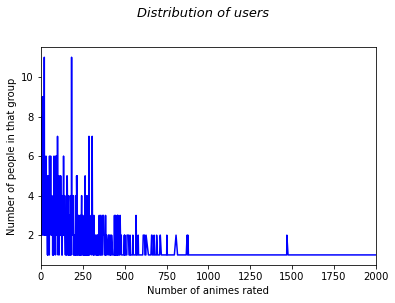

In [14]:
#Creating the plots so we can gather information about the distribution of ratings in the sample
plt.suptitle("Distribution of users", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('animes_rated', 'group_size', data = UserRatedsAggregated, color = 'blue')
plt.xlabel('Number of animes rated')
plt.ylabel('Number of people in that group')
plt.xlim(left = 0, right = 2000)
plt.show()

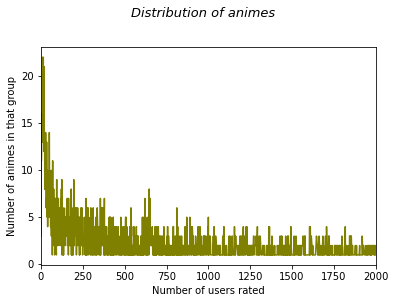

In [15]:
#Creating the plots so we can gather information about the distribution of ratings in the sample
plt.suptitle("Distribution of animes", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('number_of_users', 'group_size', data = AnimeRatedsAggregated, color = 'olive')
plt.xlabel('Number of users rated')
plt.ylabel('Number of animes in that group')
plt.xlim(left = 0, right = 2000)
plt.show()

Here we create another dataframe which contains only users and animes that have at least 10 interactions. We then combine this data by merging our initial frame with the RatedsPerUser and the RatedsPerAnime. 

The reason for this is trying to solve a problem that Recommender Systems commonly runs in to, that is the 'Cold Start Problem'. It is really hard to recommend something to a customer that you do not have data about, but there are several ways to deal with it, such as a Popularity Recommender (where I'll recommend to my new users the most liked products) and other stuff, but I'll just exclude them from my analysis since I already have a lot of data.

In [16]:
#Creating a dataframe of users  and animes with more than 10 interactions
UserRatedsCutten = UsersAndScoresSampled[UsersAndScoresSampled['animes_rated'] >= 10]
AnimeRatedsCutten = RatedsPerAnime[RatedsPerAnime['number_of_users'] >= 10]
#Joining (merging) our new dataframes with the interactions one (this will already deal with the sample problem,
#as it is an inner join). The "HotStart" name comes from a pun about solving the "Cold Start" issue
ScoresDFHotStart = pd.merge(ScoresDF, UserRatedsCutten, left_on = 'username', right_on = 'username', how = 'inner')
ScoresDFHotStart = pd.merge(ScoresDFHotStart, AnimeRatedsCutten, left_on = 'anime_id', right_on = 'anime_id', how = 'inner')

Another info that would be interesting to know is how are the user scores distributed. That could explain us what number represents something that the user liked or not (and will be used later on as a treshold too).

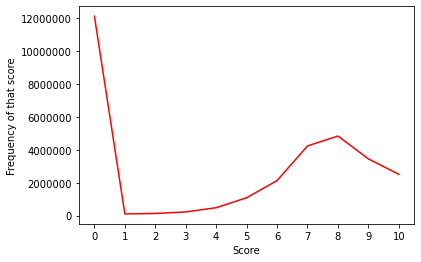

In [17]:
#Grouping the different scores and resetting the index (so the series could become a DF again) 
AnimeRates = ScoresDF['my_score'].value_counts().reset_index().sort_values('index')
plt.plot('index', 'my_score', data = AnimeRates, color = 'red')
plt.xticks(np.arange(11))
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.xlabel('Score')
plt.ylabel('Frequency of that score')
plt.show()

Here we can imply being that the data has a peak at the score of number '7', probably when someone really likes a show it rates them at that minimum. Interesting to see too that we have a lot of rated '0', Otakus are really demanding apparently.

In [18]:
#Just for the record, lets see the difference in numbers between our initial DF and the sampled and cleaned one

print('The initial dataframe has {0} registers and the sampled one has {1} rows.'.format(ScoresDF['username'].count(), ScoresDFHotStart['username'].count()))

The initial dataframe has 31283787 registers and the sampled one has 324206 rows.


# Metrics

In the following links there are explanations about how the most important metrics work:

For this specific model, I chose to base my choice on the Precision@k metric (specifically the Precision@10). The advantage of this metric above all else is the importance that it gives to the items that you actually want to recommend. The problem I see for RMSE and MAE right here is that they do their calculation for all items in the model and I'm not interested, let's say, in the difference of the true rating and the estimated rating for the 376th (sorted by descending rating) item of my customer. And the problem with the Recall@k is that I won't be able to recommend all the relevant items since some of my users have 1000 animes scored.

In [19]:
def precision_recall_at_k(predictions, k=10, threshold= 7):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    # Predictions: Traz uma lista de 5 campos dentro de uma tupla com as seguintes infos: User_ID, Item_ID, True_ID, Est_ID, Details
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    # Creates a dict with the key being a user and the value bringing the estimated rating and the true rating.

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k /  n_rel if n_rel != 0 else 1

    return precisions, recalls

# Training, testing and results structure

My initial idea was to create a user-based algorithm, where you could input a specific username and it would return to you the top@K recommendations, but I also thought of developing an item-based system, as it would be a lot better to have an empiral understanding if all of it is working or not.

So, how can I know if my algorithm is performing well or not? For this problem we split the data in a **Training** and a **Test** dataset (with a 75/25 proportion). The idea behind it is to try to guess the score for animes where we actually can do a comparison. For instance, lets say you gave an score of 10, 9, 8 and 3 to the following shows: Dragon Ball Z, Pokemon, Naruto and One Piece. We then split the first three animes, learn by it and try to estimate what would be your One Piece score, and the difference of the estimated score and the true score would tell us the performance of the recommender.

After spliting the data, I've constructed a function where we can compare pretty much any algo from the awesome Surprise lib (the only one I left out was the SVD++ for performance reasons), and then, comparing all the metrics (which I'll explain in the next cell) I chose the best recommender for this specific case.

In [20]:
random_state = 42
reader = sp.Reader(rating_scale=(0, 10))
data = sp.Dataset.load_from_df(ScoresDFHotStart[['username', 'anime_id', 'my_score']], reader)
trainset, testset = sp.model_selection.train_test_split(data, test_size=.25, random_state = random_state)
analysis = defaultdict(list)

test_dict = {'SVD' : sp.SVD(random_state=random_state), 'SlopeOne' : sp.SlopeOne(), 'NMF' : sp.NMF(random_state=random_state), 'NormalPredictor' : sp.NormalPredictor(), 'KNNBaseline' : sp.KNNBaseline(random_state=random_state), 'KNNBasic' : sp.KNNBasic(random_state=random_state), 'KNNWithMeans' : sp.KNNWithMeans(random_state=random_state), 'KNNWithZScore' : sp.KNNWithZScore(random_state=random_state), 'BaselineOnly' : sp.BaselineOnly(), 'CoClustering': sp.CoClustering(random_state=random_state)}

for key, value in test_dict.items():
    start = time.time()    
    value.fit(trainset)
    predictions = value.test(testset)

    rmse = sp.accuracy.rmse(predictions)
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=7)
    precision_avg = sum(prec for prec in precisions.values()) / len(precisions)

    analysis[value] = (key, rmse, precision_avg, time.time() - start)

print(analysis)

RMSE: 3.5223
RMSE: 3.2537
RMSE: 3.3655
RMSE: 5.1187
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.2144
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.3635
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.2437
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.2470
Estimating biases using als...
RMSE: 3.2434
RMSE: 3.2912
defaultdict(<class 'list'>, {<surprise.prediction_algorithms.matrix_factorization.SVD object at 0x000002608C5FE130>: ('SVD', 3.5222804706178525, 0.7650220755610538, 4.658284902572632), <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x000002608C5FE100>: ('SlopeOne', 3.2536559182968485, 0.8957212368425065, 45.206812620162964), <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x000002608C5FE040>: ('NMF', 3.3655207163253396, 0.7961386864659232, 7.534584045410156), <surprise.predictio

In [21]:
analysis_df = pd.DataFrame.from_dict(analysis, orient = 'index', columns = ['Algorithm', 'RMSE', 'Precision@10', 'Time to run (in seconds)']).reset_index()

#analysis_df['Algorithm'] = ['SVD', 'SlopeOne', 'NMF', 'NormalPredictor', 'KNNBaseline', 'KNNBasic', 'KNNWithMeans', 'KNNWithZScore', 'BaselineOnly', 'CoClustering']
analysis_df = analysis_df[['Algorithm', 'RMSE', 'Precision@10', 'Time to run (in seconds)']]
analysis_df = analysis_df.sort_values(by=['Precision@10'], ascending = False)
analysis_df['RMSE^-1'] = analysis_df['RMSE'] ** -1
analysis_df.head(n = 15)

,Algorithm,RMSE,Precision@10,Time to run (in seconds),RMSE^-1
8,BaselineOnly,3.243375,0.916755,1.472293,0.308321
1,SlopeOne,3.253656,0.895721,45.206813,0.307347
6,KNNWithMeans,3.243719,0.893348,18.970080,0.308288
4,KNNBaseline,3.214395,0.883658,24.137806,0.311101
9,CoClustering,3.291171,0.865126,8.314940,0.303843
7,KNNWithZScore,3.247020,0.845872,20.080622,0.307975
5,KNNBasic,3.363484,0.825126,17.844045,0.297311
2,NMF,3.365521,0.796139,7.534584,0.297131
0,SVD,3.522280,0.765022,4.658285,0.283907
3,NormalPredictor,5.118750,0.543130,1.256371,0.195360


Now I cleaned all the results data and inverted the RMSE (just because having a greater RMSEˆ-1 is now good and it looks better in a chart) and wil scatter plot them to see their difference in performance, but we can see right now that the best performing algorithm was the BaselineOnly.

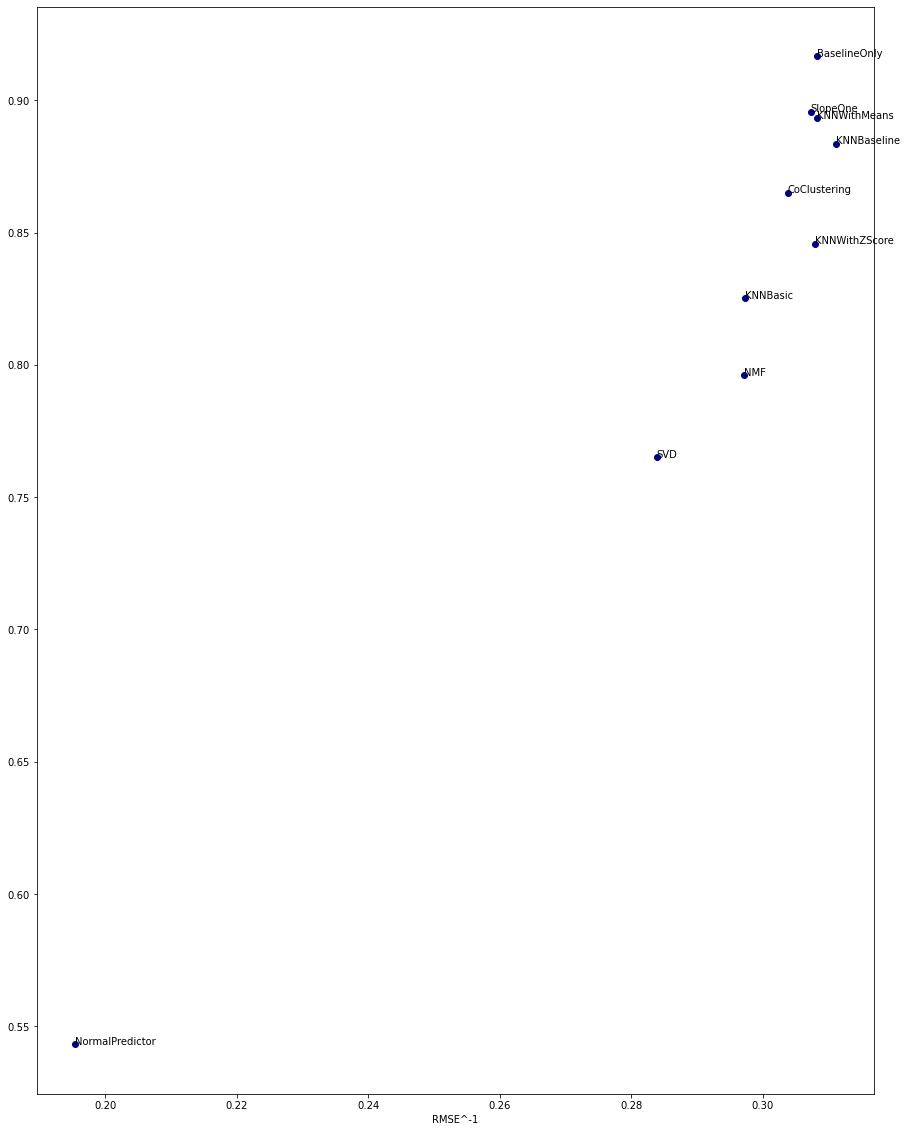

In [22]:
ax = analysis_df.set_index('RMSE^-1')['Precision@10'].plot(style='o', c = 'DarkBlue', figsize = (15, 20))
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(analysis_df['RMSE^-1'], analysis_df['Precision@10'], analysis_df['Algorithm'], ax)

Funny enough, the BaselineOnly is one of the simplest and least costing collaborative filtering algorithms. There is a definition on its paper that explains it better than I can:

" For example, suppose that we want a baseline
estimate for the rating of the movie Titanic by user Joe. Now, say that the
average rating over all movies, μ, is 3.7 stars. Furthermore, Titanic is better
than an average movie, so it tends to be rated 0.5 stars above the average. On
the other hand, Joe is a critical user, who tends to rate 0.3 stars lower than the
average. Thus, the baseline estimate for Titanic’s rating by Joe would be 3.9
stars by calculating 3.7 − 0.3 + 0.5. "

That is how Machine Learning works, sometimes a linear regression works better than a neural network.

Now that I chose my best algorithm I need to generate new recommendations for my users. For that reason, I create a  new training set, now containing all available scores and create a testing set with all animes the user didn't score but are on the training set for other users (that's why we need to take care on the site of the sample, since this part can be very costly).

In [23]:
als_param_grid = {'bsl_options': {'method': ['als'],
                              'reg_i': [5, 10, 15],
                              'reg_u': [10, 15, 20],
                              'n_epochs': [5, 10, 15, 20]
                              }
              }

sgd_param_grid = {'bsl_options': {'method': ['sgd'],
                              'reg': [0.01, 0.02, 0.03],
                              'n_epochs': [5, 10, 15, 20],
                              'learning_rate' : [0.001, 0.005, 0.01]
                              }
              }

als_gs = sp.model_selection.GridSearchCV(sp.BaselineOnly, als_param_grid, measures=['rmse'], cv = 3, joblib_verbose = 0)

sgd_gs = sp.model_selection.GridSearchCV(sp.BaselineOnly, sgd_param_grid, measures=['rmse'], cv = 3, joblib_verbose = 0)

In [24]:
als_gs.fit(data)

# best RMSE score
print(als_gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(als_gs.best_params['rmse'])

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

In [25]:
sgd_gs.fit(data)

# best RMSE score
print(sgd_gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(sgd_gs.best_params['rmse'])

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimati

Ironically enough, the default options for the parameters actually brought a better RMSE than the tweak of both grids, so we we won't change anything.

In [26]:
trainset = data.build_full_trainset()
algo = sp.BaselineOnly()
algo.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo.test(testset)
    
last_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
last_predictions.drop('rui', inplace = True, axis = 1)

Estimating biases using als...


After generating the list with all possible recommendations, I created another function that shows only the k most valuable recommendations for each customer. That way we can simulate how an actually recommender system works.

In [27]:
def bringing_first_n_values(df, uid, n=10):
    df = df[df['uid'] == uid].nlargest(n, 'est')[['uid', 'iid', 'est']]
    df = pd.merge(df, AnimesDF, left_on = 'iid', right_on = 'anime_id', how = 'left')
    return df[['uid', 'est', 'title', 'genre']]

In [28]:
bringing_first_n_values(last_predictions, 'Tomoki-sama')

,uid,est,title,genre
0,Tomoki-sama,8.050706,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance"
1,Tomoki-sama,7.910537,Mononoke Hime,"Action, Adventure, Fantasy"
2,Tomoki-sama,7.845694,Clannad: After Story,"Slice of Life, Comedy, Supernatural, Drama, Ro..."
3,Tomoki-sama,7.778978,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
4,Tomoki-sama,7.743585,Kimi no Na wa.,"Supernatural, Drama, Romance, School"
5,Tomoki-sama,7.696071,Shelter,"Sci-Fi, Music"
6,Tomoki-sama,7.593356,Final Fantasy VII: Advent Children,"Action, Super Power, Fantasy"
7,Tomoki-sama,7.593259,"Clannad: Mou Hitotsu no Sekai, Tomoyo-hen","Drama, Romance, School, Slice of Life"
8,Tomoki-sama,7.545917,One Piece 3D2Y: Ace no shi wo Koete! Luffy Nak...,"Adventure, Comedy, Fantasy, Shounen"
9,Tomoki-sama,7.541329,Tenkuu no Shiro Laputa,"Adventure, Fantasy, Romance, Sci-Fi"


Now, as I mentioned early on, I've built an item-based recommender just so we can test if our recommendations make any sense. Not all algorithms can do the item-item recommendation, so the most used ones are the unsupervised-learning-based (as this KNN that I actually use). 

In [29]:
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo_items = sp.KNNBaseline(sim_options=sim_options)
algo_items.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [30]:
def get_item_recommendations(anime_title, anime_id=100000, k=10):
    if anime_id == 100000:     
        anime_id = AnimesDF[AnimesDF['title'] == anime_title]['anime_id'].iloc[0]
        
    iid = algo_items.trainset.to_inner_iid(anime_id)
    neighbors = algo_items.get_neighbors(iid, k=k)
    raw_neighbors = (algo.trainset.to_raw_iid(inner_id) for inner_id in neighbors)
    df = pd.DataFrame(raw_neighbors, columns = ['Anime_ID'])
    df = pd.merge(df, AnimesDF, left_on = 'Anime_ID', right_on = 'anime_id', how = 'left')
    return df[['Anime_ID', 'title', 'genre']]

As I already trained the model and created a function that brings a show based on it's name, let's test it with one of the most famous animes of all time. Dragon Ball! 

In [39]:
final_recommendations = get_item_recommendations('Dragon Ball Z', k=30)
final_recommendations

,Anime_ID,title,genre
0,223,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou..."
1,225,Dragon Ball GT,"Action, Adventure, Comedy, Fantasy, Magic, Sci..."
2,527,Pokemon,"Action, Adventure, Comedy, Kids, Fantasy"
3,552,Digimon Adventure,"Action, Adventure, Comedy, Fantasy, Kids"
4,1709,Pokemon: Mewtwo! Ware wa Koko ni Ari,"Action, Adventure, Comedy, Drama, Fantasy, Kids"
5,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ..."
6,530,Bishoujo Senshi Sailor Moon,"Demons, Magic, Romance, Shoujo"
7,43,Ghost in the Shell,"Action, Sci-Fi, Police, Psychological, Mecha, ..."
8,481,Yu☆Gi☆Oh! Duel Monsters,"Adventure, Game, Shounen"
9,986,Dragon Ball Z Special 1: Tatta Hitori no Saish...,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen"


# Thank you!